In [21]:
from scipy.signal import bode, TransferFunction
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_csv('sim_out_200g_new.csv')
df

,time,pos_25.0,pos_26.142857142857142,pos_27.285714285714285,pos_28.428571428571427,pos_29.57142857142857,pos_30.714285714285715,pos_31.857142857142858,pos_33.0,pos_30.5,pos_30.833333333333332,pos_31.166666666666668,pos_31.5
0,0.00,0.140735,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864,0.149864
1,0.01,0.140645,0.148236,0.148232,0.148228,0.148224,0.148220,0.148216,0.148213,0.148221,0.148220,0.148219,0.148218
2,0.02,0.140375,0.145904,0.145889,0.145873,0.145858,0.145843,0.145828,0.145813,0.145846,0.145841,0.145837,0.145833
3,0.03,0.139876,0.143092,0.143058,0.143024,0.142990,0.142957,0.142925,0.142893,0.142963,0.142954,0.142944,0.142935
4,0.04,0.139149,0.140063,0.140004,0.139947,0.139892,0.139839,0.139787,0.139737,0.139849,0.139833,0.139818,0.139803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.96,0.149058,0.131550,0.150562,0.130511,0.151085,0.130548,0.150458,0.131761,0.130757,0.132066,0.140569,0.149157
297,2.97,0.149609,0.131332,0.150406,0.131065,0.150133,0.131881,0.148778,0.133743,0.130167,0.134310,0.143811,0.150688
298,2.98,0.149608,0.131753,0.149533,0.132395,0.148365,0.134043,0.146289,0.136480,0.130552,0.137160,0.146756,0.151239
299,2.99,0.149055,0.132785,0.148010,0.134394,0.145934,0.136831,0.143241,0.139676,0.131878,0.140347,0.149121,0.150757


<AxesSubplot:xlabel='time'>

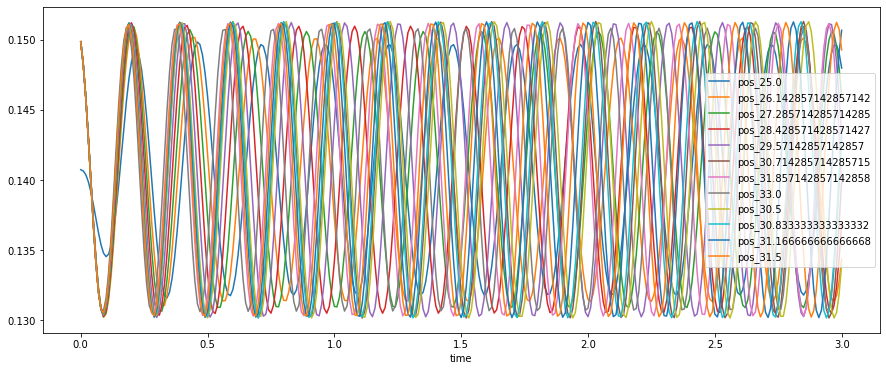

In [23]:
df.plot(x='time', figsize=(15, 6))

In [24]:
N = df.shape[0]

In [25]:
DC = 0.0049
omegas = [float(col.lstrip('pos_')) for col in df.columns[1:]]
maxes = np.array([np.max(df[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df.columns[1:]])
mins = np.array([np.min(df[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df.columns[1:]])
amps = (maxes - mins)/2
amps

array([0.00893465, 0.00940202, 0.00984012, 0.01021958, 0.01048509,
       0.01056928, 0.01043649, 0.01004274, 0.01057129, 0.01056749,
       0.01054518, 0.01050369])

Text(0.5, 0, 'w (rad/s)')

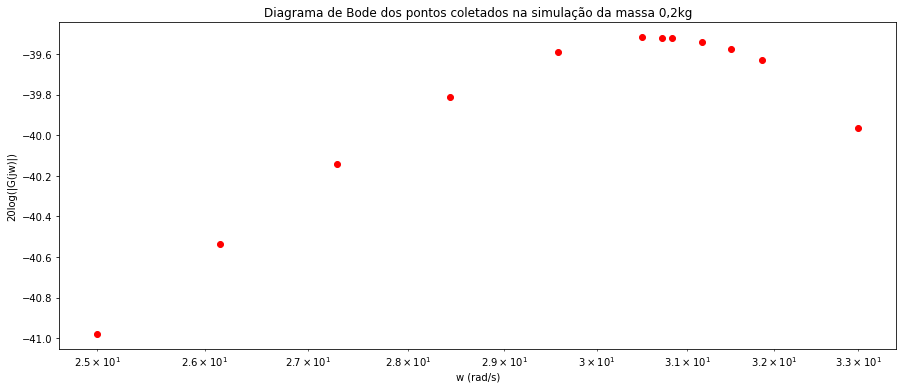

In [26]:
plt.figure(figsize=(15, 6))
plt.xscale('log')
amps_bode = 20*np.log10(abs(amps))
plt.plot(omegas, amps_bode, 'ro')
plt.title("Diagrama de Bode dos pontos coletados na simulação da massa 0,2kg")
plt.ylabel("20log(|G(jw)|)")
plt.xlabel("w (rad/s)")

In [27]:
# pico e frequencia de ressonancia
M_p = np.max(amps)
w_r = omegas[np.where(amps == M_p)[0][0]]
w_r, M_p

(30.5, 0.010571286082267747)

In [28]:
# epsilon e wn
M_p = M_p/DC
epsilon = np.sqrt(np.polynomial.Polynomial([-1/M_p**2, 4, -4]).roots())[0]
w_n = w_r/np.sqrt(1-2*epsilon**2)
w_n, epsilon

(32.40124956731678, 0.23865604735587476)

In [29]:
omegas_sorted = np.sort(omegas)
amplitudes = pd.DataFrame({"Frequências": omegas_sorted, "Mp": amps})
amplitudes.T

,0,1,2,3,4,5,6,7,8,9,10,11
Frequências,25.000000,26.142857,27.285714,28.428571,29.571429,30.500000,30.714286,30.833333,31.166667,31.500000,31.857143,33.000000
Mp,0.008935,0.009402,0.009840,0.010220,0.010485,0.010569,0.010436,0.010043,0.010571,0.010567,0.010545,0.010504


In [30]:
# mass 0,3kg
df_a = pd.read_csv('sim_out_300g_new.csv')
N = df.shape[0]
omegas_a = [float(col.lstrip('pos_')) for col in df_a.columns[1:]]
maxes_a = np.array([np.max(df_a[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df_a.columns[1:]])
mins_a = np.array([np.min(df_a[col].to_numpy(dtype=np.float64)[3*N//4:]) for col in df_a.columns[1:]])
amps_a = (maxes_a - mins_a)/2
M_p_a = np.max(amps_a)
w_r_a = omegas_a[np.where(amps_a == M_p_a)[0][0]]
M_p_a = M_p_a/DC
epsilon_a = np.sqrt(np.polynomial.Polynomial([-1/M_p_a**2, 4, -4]).roots())[0]
w_n_a = w_r_a/np.sqrt(1-2*epsilon_a**2)
w_n_a, epsilon_a

(26.513976981509593, 0.193679745555023)

Text(0.5, 0, 'w (rad/s)')

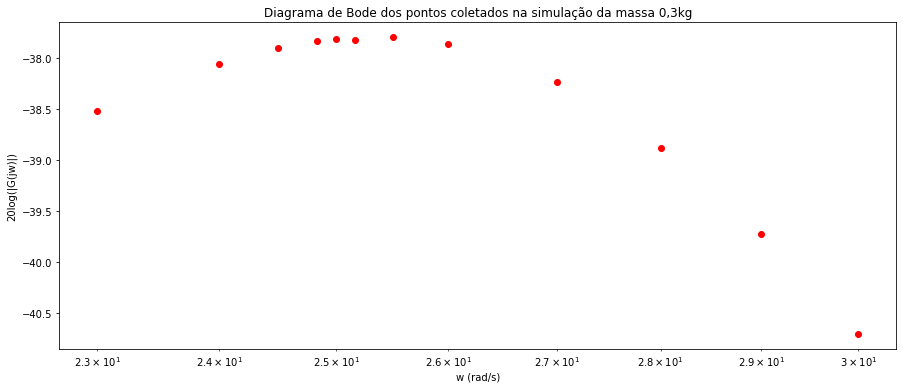

In [31]:
plt.figure(figsize=(15, 6))
plt.xscale('log')
amps_bode_a = 20*np.log10(abs(amps_a))
plt.plot(omegas_a, amps_bode_a, 'ro')
plt.title("Diagrama de Bode dos pontos coletados na simulação da massa 0,3kg")
plt.ylabel("20log(|G(jw)|)")
plt.xlabel("w (rad/s)")

In [32]:
omegas_a = np.sort(omegas_a)
amplitudes_a = pd.DataFrame({"Frequências": omegas_a, "Mp": amps_a})
amplitudes_a.T

,0,1,2,3,4,5,6,7,8,9,10,11
Frequências,23.000000,24.000000,24.500000,24.833333,25.000000,25.166667,25.500000,26.000000,27.000000,28.000000,29.000000,30.000000
Mp,0.011858,0.012512,0.012861,0.012795,0.012264,0.011381,0.010323,0.009221,0.012736,0.012839,0.012855,0.012894


In [33]:
m_a = .1
m = (m_a*w_n_a**2)/(w_n**2 - w_n_a**2)
k = m*w_n**2
b = 2*epsilon*np.sqrt(m*k)
m, k, b

(0.20267867352763194, 212.78037592871004, 3.134528708131448)

In [34]:
M, K, B = .2, 203, 3
m_err, k_err, b_err = (m-M)/M, (k-K)/K, (b-B)/B
m_err*100, k_err*100, b_err*100

(1.3393367638159654, 4.817919176704455, 4.4842902710482715)

In [35]:
DC*k

1.0426238420506793

In [36]:
w, mag, phase = bode(TransferFunction([DC*k], [m, b, k]))

Text(0.5, 0, 'w (rad/s)')

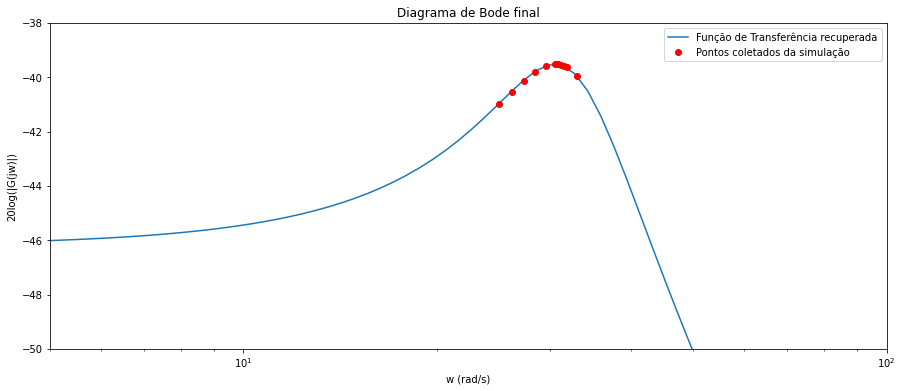

In [37]:
plt.figure(figsize=(15, 6))
plt.xscale('log')
plt.plot(w, mag, label="Função de Transferência recuperada")
plt.plot(omegas, amps_bode, 'ro', label="Pontos coletados da simulação")
plt.ylim(-50, -38)
plt.xlim(5, 100)
plt.legend()
plt.title("Diagrama de Bode final")
plt.ylabel("20log(|G(jw)|)")
plt.xlabel("w (rad/s)")
#plt.legend()


Text(0.5, 0, 'w (rad/s)')

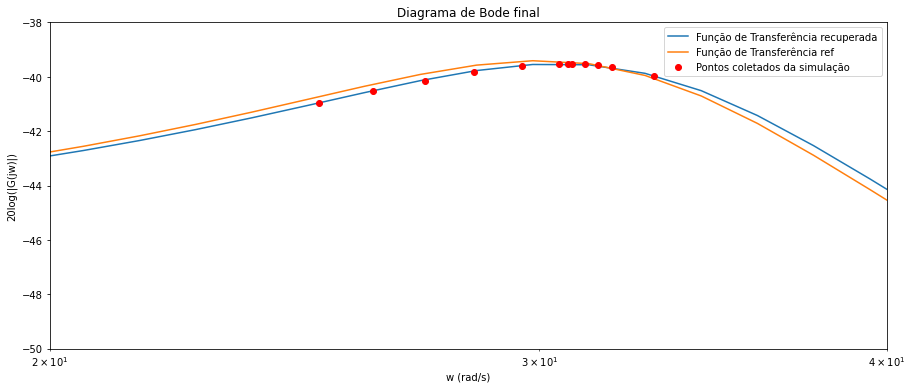

In [39]:
w_ref, mag_ref, phase_ref = bode(TransferFunction([DC*K], [M, B, K]))
plt.figure(figsize=(15, 6))
plt.xscale('log')
plt.plot(w, mag, label="Função de Transferência recuperada")
plt.plot(w_ref, mag_ref, label="Função de Transferência ref")
plt.plot(omegas, amps_bode, 'ro', label="Pontos coletados da simulação")
plt.ylim(-50, -38)
plt.xlim(20, 40)
plt.legend()
plt.title("Diagrama de Bode final")
plt.ylabel("20log(|G(jw)|)")
plt.xlabel("w (rad/s)")
#plt.legend()
